In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
x    = np.arange(-10, 10, 0.01)
offs = 0
x
y    =  np.cos(4*x) + 0.01*x*x + 0.1*x + offs


In [3]:
x.shape

(2000,)

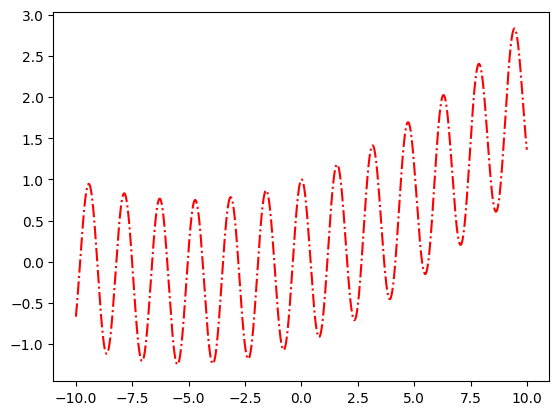

In [4]:
plt.plot(x, y,'-.r')
plt.show()

In [5]:
n   = 170 #choose "n" samples from the function
idx = np.random.choice(y.size, n, replace = False)

px  = x[idx]
py  = y[idx].T

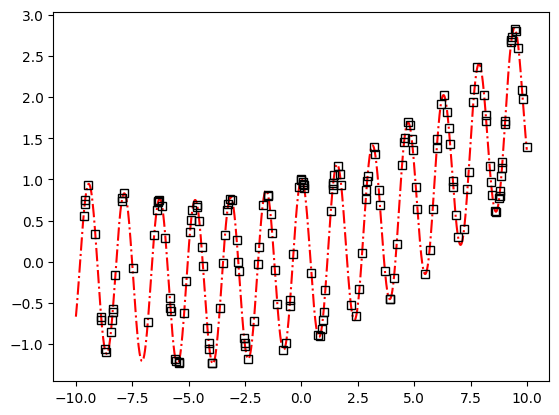

In [6]:
plt.plot(x, y,'-.r')
plt.plot(px, py,'sk',mfc='none')
plt.show()

In [7]:
m = 20 #how many RBFs we choose randomly from the "n" samples
cen = idx[np.random.choice(n,m, replace = False)]
cx = x[cen];

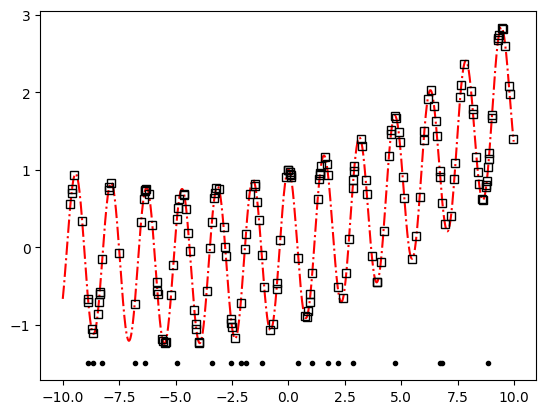

In [9]:
plt.plot(x, y,'-.r')
plt.plot(px, py,'sk',mfc='none')
plt.plot(cx,cx.size*[offs-1.5], '.k')
plt.show()

In [10]:
rbf = lambda x,c,s: np.exp(-(x-c)**2 / (2*s*s))
F = np.zeros((n,m))  #set-up the RBF matrix here
s = 0.5 #just some fixed width!
for i in range(n):
  for j in range(m):
    F[i,j] = rbf(px[i], cx[j], s);


w = np.matmul(np.linalg.pinv(F) , py)


In [11]:
F2 = np.ones((x.size,m))
for j in range(m):
  for i in range(x.size):
    F2[i,j] = rbf(x[i], cx[j], s)
F2

array([[9.40007783e-247, 5.37165145e-058, 1.10472202e-309, ...,
        5.63729844e-107, 8.48228707e-055, 5.76760628e-023],
       [1.84251756e-246, 7.43155701e-058, 2.34853971e-309, ...,
        8.77235194e-107, 1.16275829e-054, 7.06008534e-023],
       [3.61009063e-246, 1.02772775e-057, 4.99078761e-309, ...,
        1.36454339e-106, 1.59328038e-054, 8.63874346e-023],
       ...,
       [2.72935642e-009, 1.07291726e-122, 8.50768767e-002, ...,
        1.10757331e-069, 1.77803142e-127, 8.04706993e-194],
       [2.40672244e-009, 6.67765206e-123, 8.13658197e-002, ...,
        7.75359425e-070, 1.09648193e-127, 4.43136667e-194],
       [2.12137791e-009, 4.15439346e-123, 7.77855187e-002, ...,
        5.42575201e-070, 6.75911459e-128, 2.43929251e-194]])

In [12]:
Y = np.matmul(F2,w)
Y

array([0.24394743, 0.25300874, 0.26226853, ..., 0.1582941 , 0.1513893 ,
       0.14472779])

In [13]:
Y.shape

(2000,)

<ipython-input-14-13082eeef128>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, Y, 'k',c='blue')


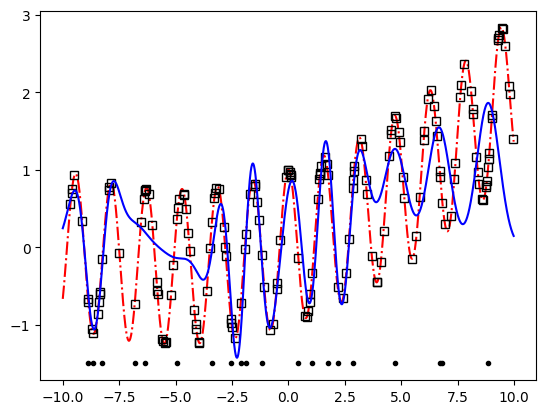

In [14]:
plt.plot(x, y,'-.r')
plt.plot(px, py,'sk',mfc='none')
plt.plot(cx,cx.size*[offs-1.5], '.k')
plt.plot(x, Y, 'k',c='blue')
plt.show()